In [82]:
#pip install pandas-market-calendars
#pip install tensorflow

In [83]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv(r"C:\Users\Praveen soni\excelr class room\excelr project\P639 DATASET.csv")

In [85]:
display("Top five Row dataset",df.head())

'Top five Row dataset'

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [86]:
display("Bottam four Row of dataset",df.tail())

'Bottam four Row of dataset'

,Date,Open,High,Low,Close,Adj Close,Volume
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,30-12-2019,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [87]:
display("information of dataset",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


'information of dataset'

None

In [88]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Open,2011.0,1.267075e+02,5.048375e+01,5.542429e+01,8.588286e+01,1.130500e+02,1.651900e+02,2.911200e+02
High,2011.0,1.278276e+02,5.092630e+01,5.708571e+01,8.671786e+01,1.141900e+02,1.674100e+02,2.939700e+02
Low,2011.0,1.255803e+02,5.012494e+01,5.501429e+01,8.505643e+01,1.118700e+02,1.634250e+02,2.881200e+02
Close,2011.0,1.267412e+02,5.057837e+01,5.579000e+01,8.620214e+01,1.130500e+02,1.652450e+02,2.915200e+02
Adj Close,2011.0,1.195055e+02,5.243844e+01,4.892193e+01,7.505668e+01,1.052229e+02,1.600471e+02,2.895226e+02
Volume,2011.0,5.949670e+07,4.683856e+07,1.136200e+07,2.758565e+07,4.346900e+07,7.471030e+07,3.765300e+08


In [89]:
display("duplicated rows in dataset",df.duplicated().sum())

'duplicated rows in dataset'

np.int64(0)

In [90]:
display("null values in dataset",df.isnull().sum())

'null values in dataset'

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [91]:
invalid_masks = df.applymap(
    lambda x:isinstance(x,str) and x.strip() in ["?","NA","n.a","na","N.A","-","--","---","null","NULL","Null"," ","",None]
)
display("Invalid entries in dataset:\n", invalid_masks.sum())

'Invalid entries in dataset:\n'

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [92]:
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)
df = df.set_index("Date").sort_index()

In [93]:
print("Date range:",df.index.min(),"to",df.index.max())
print("====================================")
print("Total Trading Days:", len(df))

Date range: 2012-01-03 00:00:00 to 2019-12-30 00:00:00
Total Trading Days: 2011


In [94]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
 
outliers_summary = {}
 
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_summary[col] = {
        "outlier_count": outliers.shape[0],
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }
 

outliers_df = pd.DataFrame(outliers_summary).T
print(outliers_df)

           outlier_count   lower_bound   upper_bound
Open                 4.0 -3.307786e+01  2.841507e+02
High                 3.0 -3.432035e+01  2.884482e+02
Low                  4.0 -3.249643e+01  2.809778e+02
Close                5.0 -3.236214e+01  2.838093e+02
Adj Close            3.0 -5.242897e+01  2.875328e+02
Volume             127.0 -4.310132e+07  1.453973e+08


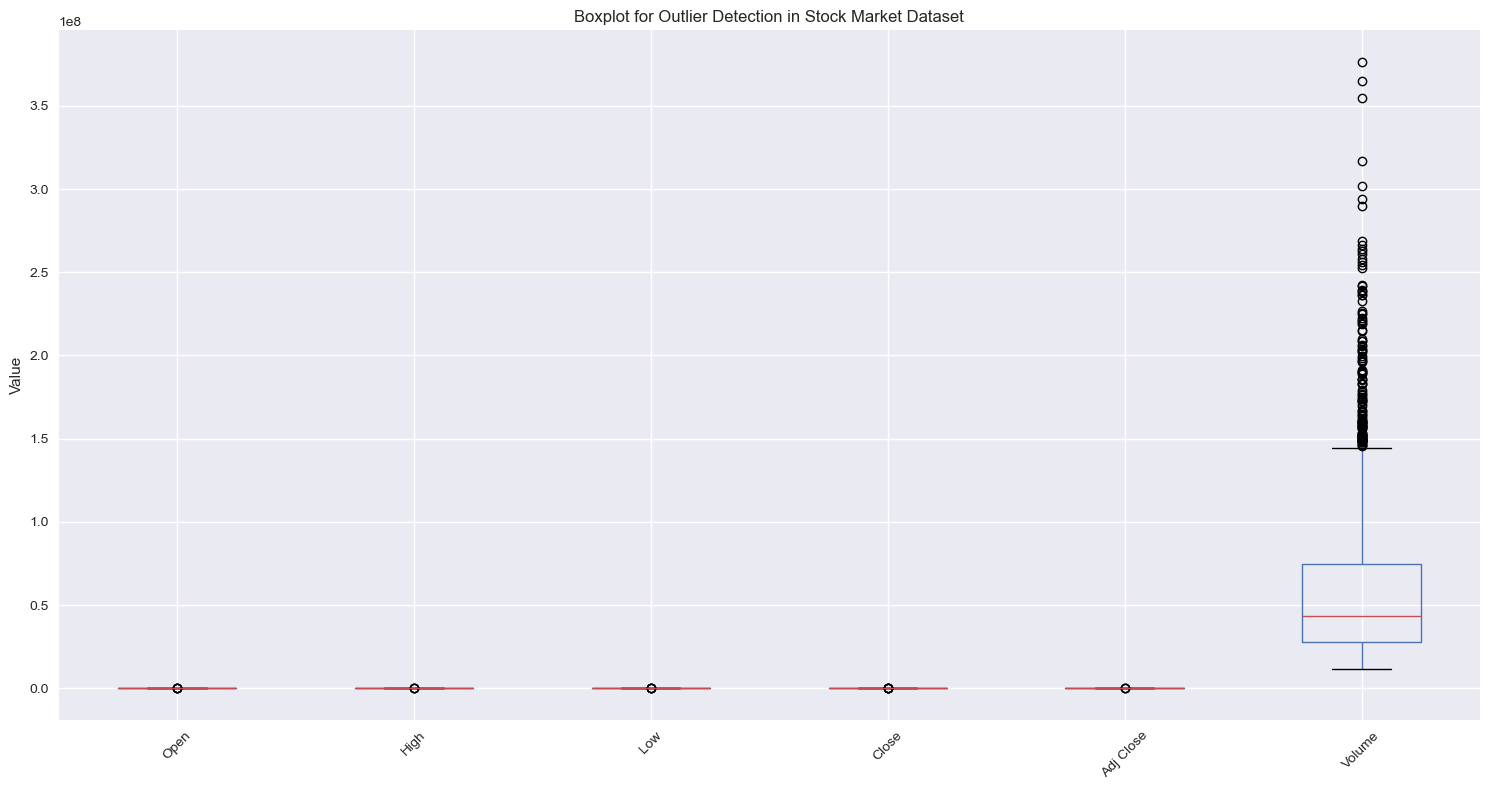

In [95]:
plt.figure(figsize=(15, 8))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot for Outlier Detection in Stock Market Dataset")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

In [96]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE') # New York Stock Exchange

schedule = nyse.schedule(start_date=df.index.min(), end_date=df.index.max())


all_dates = schedule.index

missing_dates = all_dates.difference(df.index)
print(f"Missing trading days: {len(missing_dates)}")
print("Sample missing dates:", missing_dates[:5].tolist())

Missing trading days: 0
Sample missing dates: []


OHLC Rule : Outliers, errors, or bad data entries 
- Rule: The daily High should always be greater than or equal to the Low.
- Rule: The Close price should never exceed the High of the day.
- Rule: The Close should not be below the Low.
- Rule: The Open price should not exceed the High.

In [97]:
print("\n=== Data Quality Checks ===")
print("Days where High < Low:", (df['High'] < df['Low']).sum())
print("Days where Close > High:", (df['Close'] > df['High']).sum())
print("Days where Close < Low:", (df['Close'] < df['Low']).sum())
print("Days where Open > High:", (df['Open'] > df['High']).sum())


=== Data Quality Checks ===
Days where High < Low: 0
Days where Close > High: 0
Days where Close < Low: 0
Days where Open > High: 0


**Classical Decomposition**

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(df["Close"],model="additive",period =20)

trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

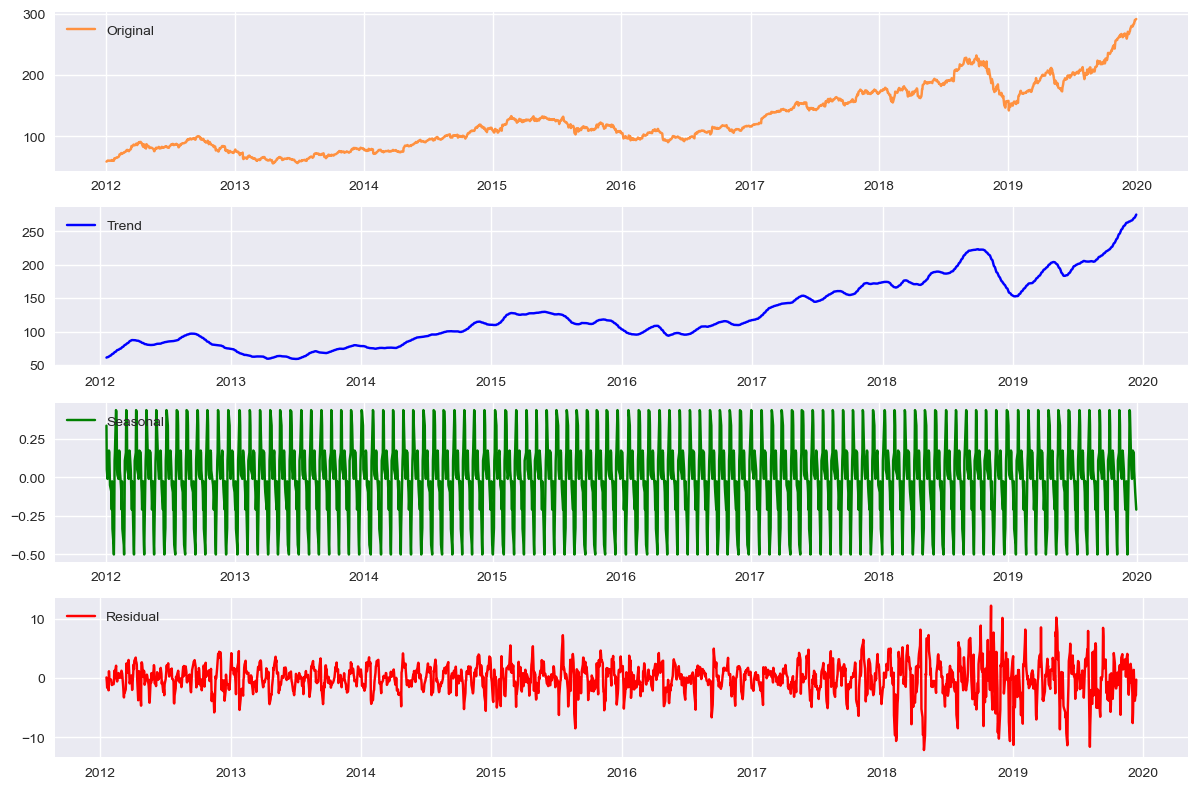

In [99]:
plt.figure(figsize=(12, 8))
plt.subplot(4,1,1)
plt.plot(df["Close"],label="Original",color ="#FF9140")
plt.legend(loc ="upper left")

plt.subplot(4, 1, 2)
plt.plot(trend_additive, label='Trend', color='blue')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(seasonal_additive, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(residual_additive, label='Residual', color='red')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Original: Shows actual Apple stock price movement over time.

Trend: Indicates a strong long-term upward growth.

Seasonality: Repeating patterns with relatively small impact.

Residual: Random fluctuations caused by unexpected market events.

**Seasonal and Trend decomposition**

In [100]:
from statsmodels.tsa.seasonal import STL
stl = STL(df["Close"],period =30)
result = stl.fit()

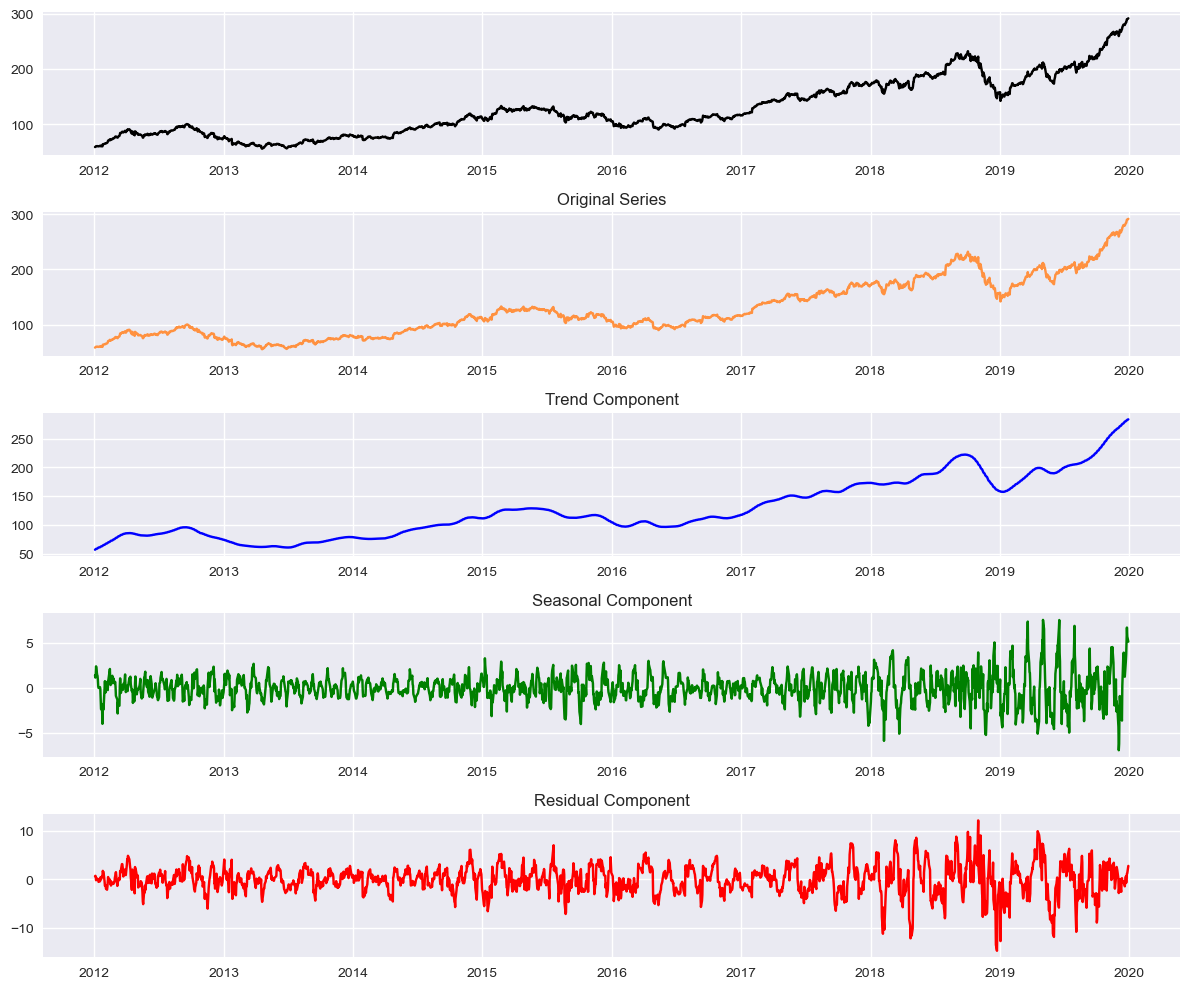

In [101]:
# Plot the decomposition
plt.figure(figsize=(12, 10))
plt.subplot(5,1,1)
plt.plot(result.observed,label ="Original",color = "black")

# Original series
plt.subplot(5, 1, 2)
plt.plot(df["Close"], label ="Original",color = "#FF9140")
plt.title("Original Series")

# Trend component
plt.subplot(5, 1, 3)
plt.plot(result.trend, color="blue")
plt.title("Trend Component")

# Seasonal component
plt.subplot(5, 1, 4)
plt.plot(result.seasonal, color="green")
plt.title("Seasonal Component")

# Residual component
plt.subplot(5, 1, 5)
plt.plot(result.resid, color="red")
plt.title("Residual Component")

plt.tight_layout()
plt.show()

Original Series: Actual Apple stock price showing long-term growth with short-term fluctuations.

Trend Component: Clear upward trend, indicating sustained growth over time.

Seasonal Component: Small, repeating patterns with limited influence on price movement.

Residual Component: Random noise and sudden spikes caused by unexpected market events.

In [102]:
from statsmodels.tsa.stattools import adfuller,kpss

def strict_stationarity_test(series, signif=0.05):
    
    adf_result = adfuller(series, autolag='AIC')
    adf_stat, adf_pvalue, adf_lags, adf_obs, adf_crit = adf_result[:5]
    
   
    kpss_result = kpss(series, regression='ct', nlags="auto")
    kpss_stat, kpss_pvalue, kpss_lags, kpss_crit = kpss_result
    
    print("=== Strict Stationarity Test ===")
    print("\nADF Test:")
    print(f"  Statistic: {round(adf_stat, 3)}")
    print(f"  p-value: {round(adf_pvalue, 3)}")
    print(f"  Conclusion: {'Stationary' if adf_pvalue < signif else 'Non-Stationary'}")
    
    print("\nKPSS Test:")
    print(f"  Statistic: {round(kpss_stat, 3)}")
    print(f"  p-value: {round(kpss_pvalue, 3)}")
    print(f"  Conclusion: {'Non-Stationary' if kpss_pvalue < signif else 'Stationary'}")
    
    print("\nOverall Strict Conclusion:")
    if adf_pvalue < signif and kpss_pvalue > signif:
        print("✅ Strong evidence of stationarity (both tests agree).")
    elif adf_pvalue > signif and kpss_pvalue < signif:
        print("❌ Strong evidence of non-stationarity (both tests agree).")
    else:
        print("⚠️ Inconclusive — results conflict, consider differencing or transformations.")

In [103]:
strict_stationarity_test(df["Close"], signif=0.05)

=== Strict Stationarity Test ===

ADF Test:
  Statistic: 1.219
  p-value: 0.996
  Conclusion: Non-Stationary

KPSS Test:
  Statistic: 0.717
  p-value: 0.01
  Conclusion: Non-Stationary

Overall Strict Conclusion:
❌ Strong evidence of non-stationarity (both tests agree).


In [104]:
prices = df["Close"]
prices_diff = prices.diff().dropna()
display(prices_diff)

Date
2012-01-04    0.315716
2012-01-05    0.655712
2012-01-06    0.624286
2012-01-09   -0.095714
2012-01-10    0.215713
                ...   
2019-12-23    4.559998
2019-12-24    0.269989
2019-12-26    5.640015
2019-12-27   -0.110016
2019-12-30    1.720001
Name: Close, Length: 2010, dtype: float64

In [105]:
display(strict_stationarity_test(prices_diff, signif=0.05))

=== Strict Stationarity Test ===

ADF Test:
  Statistic: -13.626
  p-value: 0.0
  Conclusion: Stationary

KPSS Test:
  Statistic: 0.093
  p-value: 0.1
  Conclusion: Stationary

Overall Strict Conclusion:
✅ Strong evidence of stationarity (both tests agree).


None

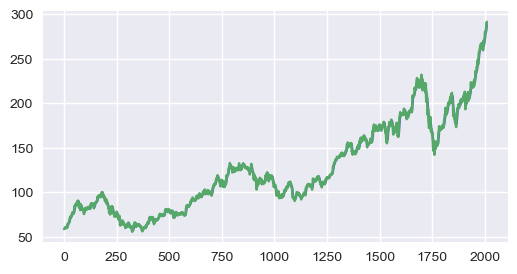

In [106]:
prices_ma = prices.rolling(window=5).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()

plt.figure(figsize = (6,3))
plt.plot(np.arange(len(prices)),prices_ma)
plt.plot(np.arange(len(prices)),prices)
plt.show()

Shows Apple stock price trend over time with clear long-term upward movement.

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(prices,model = "additive",period = 30)
prices_adjusted = prices/decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()

In [108]:
strict_stationarity_test(prices_adjusted, signif=0.05)

=== Strict Stationarity Test ===

ADF Test:
  Statistic: -22.338
  p-value: 0.0
  Conclusion: Stationary

KPSS Test:
  Statistic: 0.005
  p-value: 0.1
  Conclusion: Stationary

Overall Strict Conclusion:
✅ Strong evidence of stationarity (both tests agree).


In [109]:
df["SMA_20"] = df["Close"].rolling(window = 20).mean()
df["SMA_50"] = df["Close"].rolling(window =50).mean()
df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()

In [110]:
#moving average convergence divergence 
df["MACD"] = df["EMA_12"]-df["EMA_26"]
df["MACD_signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["MACD_histogram"]=df["MACD"]-df["MACD_signal"]

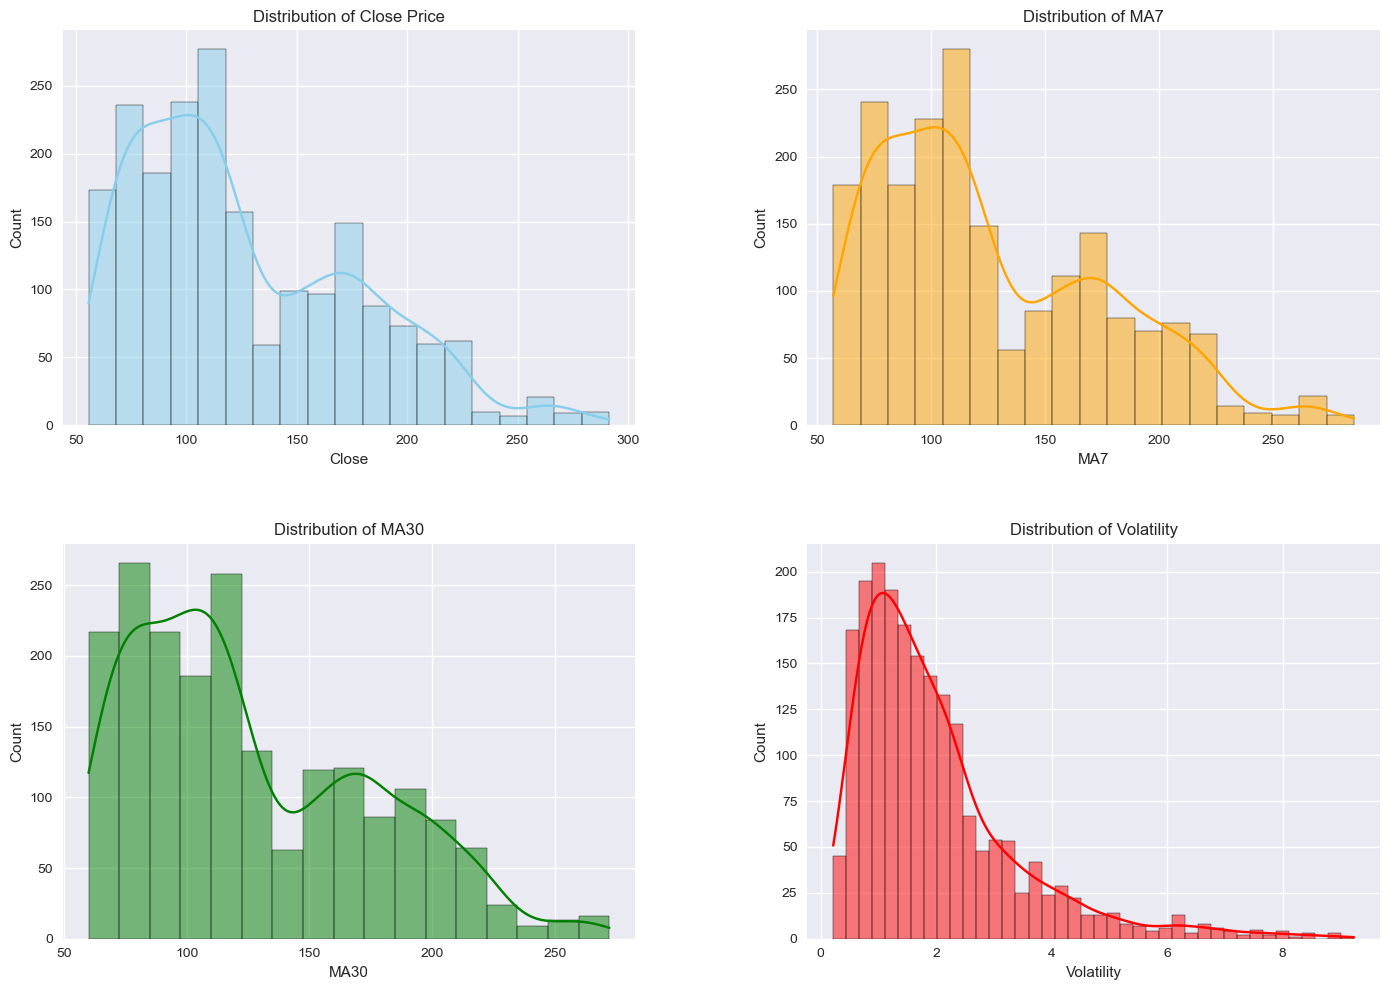

In [111]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

df['Volatility'] = df['Close'].rolling(window=7).std()

plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['Close'].dropna(), kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of Close Price')

sns.histplot(df['MA7'].dropna(), kde=True, ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Distribution of MA7')

sns.histplot(df['MA30'].dropna(), kde=True, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Distribution of MA30')

sns.histplot(df['Volatility'].dropna(), kde=True, ax=axs[1, 1], color='red')
axs[1, 1].set_title('Distribution of Volatility')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.savefig("distribution_plots.png", dpi=300)

Close Price: Right-skewed distribution, indicating prices spent more time at lower levels with fewer high-price periods.

MA7: Smoother distribution than raw prices, reducing short-term noise.

MA30: Even smoother and more concentrated, reflecting long-term trend behavior.

Volatility: Highly right-skewed, showing most days have low volatility with occasional high-risk spikes

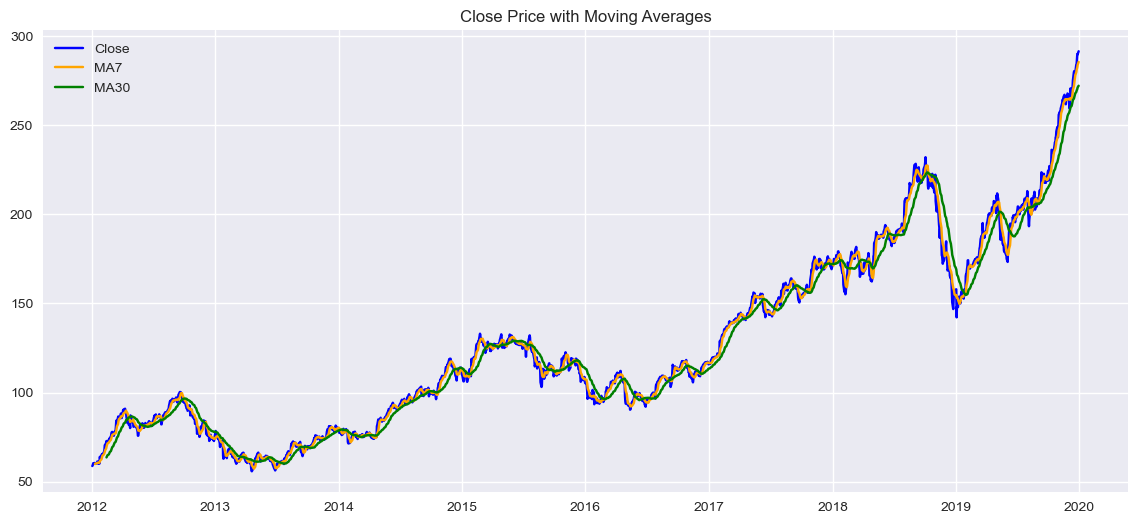

In [112]:
# Time series plot: Close with MA7 and MA30
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close', color='blue')
plt.plot(df['MA7'], label='MA7', color='orange')
plt.plot(df['MA30'], label='MA30', color='green')
plt.title("Close Price with Moving Averages")
plt.legend()
#plt.savefig(r"C:\Users\Praveen soni\excelr class room\excelr project\plots\close_with_ma.png")


Close Price: Shows actual day-to-day stock price movement.

MA7: Reacts quickly to price changes, capturing short-term trends.

MA30: Smoother curve highlighting the long-term trend.

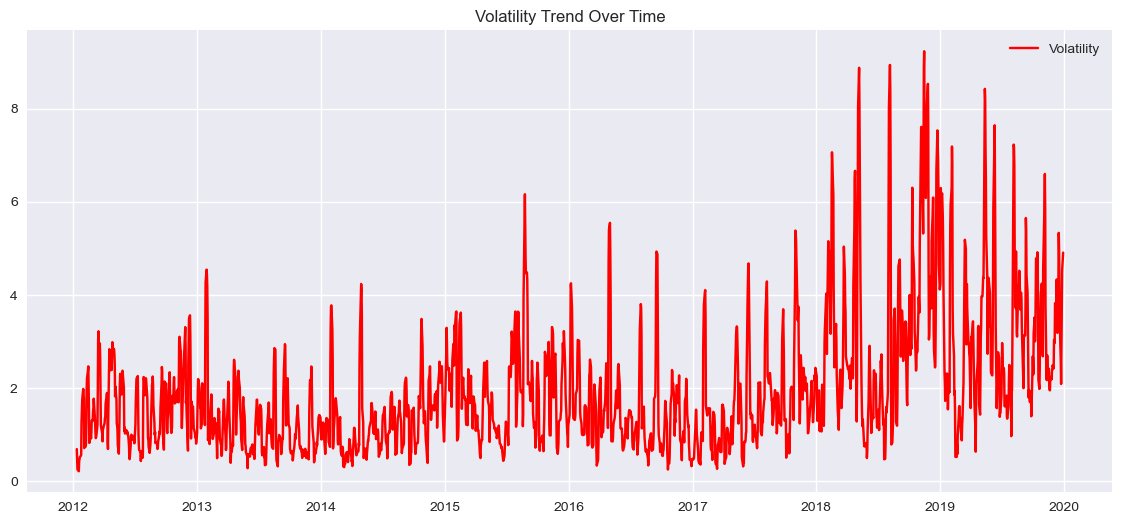

In [113]:
# Volatility trend
plt.figure(figsize=(14, 6))
plt.plot(df['Volatility'], label='Volatility', color='red')
plt.title("Volatility Trend Over Time")
plt.legend()
#plt.savefig(r"C:\Users\Praveen soni\excelr class room\excelr project\plots\volatility_trend.png")

Shows stock price volatility over time.
Volatility remains relatively low and stable in early years.
Sharp spikes indicate periods of high market uncertainty.
Increased volatility toward later years reflects stronger market reactions.

feature engerneering

In [114]:
# RSI (Relative Strength Index)
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = calculate_rsi(df['Close'], 14)

In [115]:
# Bollinger Bands
df['BB_Middle'] = df['Close'].rolling(window=20).mean()
df['BB_Std'] = df['Close'].rolling(window=20).std()
df['BB_Upper'] = df['BB_Middle'] + (df['BB_Std'] * 2)
df['BB_Lower'] = df['BB_Middle'] - (df['BB_Std'] * 2)
df['BB_Width'] = (df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle']
df['BB_Position'] = (df['Close'] - df['BB_Lower']) / (df['BB_Upper'] - df['BB_Lower'])

In [116]:
# Daily Returns and Volatility
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return_Abs'] = df['Daily_Return'].abs()
df['Volatility_5'] = df['Daily_Return'].rolling(window=5).std() * np.sqrt(252)
df['Volatility_20'] = df['Daily_Return'].rolling(window=20).std() * np.sqrt(252)
df['Volatility_60'] = df['Daily_Return'].rolling(window=60).std() * np.sqrt(252)

In [117]:
# Average True Range (ATR)
df['High_Low'] = df['High'] - df['Low']
df['High_PrevClose'] = abs(df['High'] - df['Close'].shift(1))
df['Low_PrevClose'] = abs(df['Low'] - df['Close'].shift(1))
df['True_Range'] = df[['High_Low', 'High_PrevClose', 'Low_PrevClose']].max(axis=1)
df['ATR_14'] = df['True_Range'].rolling(window=14).mean()

In [118]:
# Price-based features
df['Price_Change'] = df['Close'].diff()
df['Price_Change_Pct'] = df['Close'].pct_change() * 100
df['High_Low_Pct'] = ((df['High'] - df['Low']) / df['Low']) * 100

In [119]:
# Volume features
df['Volume_SMA_20'] = df['Volume'].rolling(window=20).mean()
df['Volume_Ratio'] = df['Volume'] / df['Volume_SMA_20']

In [120]:
# Market trend indicator (S&P 500 proxy - simulated correlation)
np.random.seed(42)
market_corr = 0.85
df['Market_Trend'] = df['Daily_Return'].rolling(20).mean() * market_corr + \
                     np.random.normal(0, 0.001, len(df))

In [121]:
# Simulated VIX (Volatility Index) - inverse relationship with price stability
df['VIX_Proxy'] = df['Volatility_20'] * 100 + np.random.normal(0, 2, len(df))

In [122]:
# Simulated Interest Rate environment (based on period 2012-2019 trend)
date_ordinals = (df.index - df.index[0]).days
df['Interest_Rate_Proxy'] = 0.25 + (date_ordinals / 365) * 0.15 + \
                           np.sin(date_ordinals / 365 * 2 * np.pi) * 0.25

In [123]:
# On-Balance Volume (OBV)
obv = (np.sign(df["Close"].diff()).fillna(0) * df["Volume"]).cumsum()
df["OBV"] = obv

In [124]:
# Stochastic oscillator (%K and %D)
stoch_w = 14
low_min = df["Low"].rolling(window=stoch_w).min()
high_max = df["High"].rolling(window=stoch_w).max()
df["Stoch_%K"] = 100 * ((df["Close"] - low_min) / (high_max - low_min))
df["Stoch_%D"] = df["Stoch_%K"].rolling(window=3).mean()

In [125]:
# Williams %R
wr_w = 14
highest_high = df["High"].rolling(window=wr_w).max()
lowest_low = df["Low"].rolling(window=wr_w).min()
df["Williams_%R"] = -100 * (highest_high - df["Close"]) / (highest_high - lowest_low)


In [126]:
# Seasonality features
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['DayOfWeek'] = df.index.dayofweek
df['Is_Month_End'] = df.index.is_month_end.astype(int)

In [127]:
print("Technical indicators created:")
print(f"- Moving Averages: SMA_20, SMA_50, SMA_200")
print(f"- Exponential MAs: EMA_12, EMA_26")
print(f"- ATR indicator: ATR_14")
print(f"- Bollinger Bands: BB_Upper, BB_Middle, BB_Lower","BB_Width")
print(f"- Volatility metrics: Volatility_5, Volatility_20, Volatility_60")
print(f"- Price-based features: Price_Change, Price_Change_Pct, High_Low_Pct")
print(f"- Volume features: Volume_SMA_20, (Volume_Ratio (1 > strong participation) , (1 < weak participation) ,(>2 or <0.5 anomalies, outliers) )")
print("- External Proxies: Market_Trend, VIX_Proxy, Interest_Rate_Proxy")
print("- Seasonality: Month, Quarter, DayOfWeek, Is_Month_End")

Technical indicators created:
- Moving Averages: SMA_20, SMA_50, SMA_200
- Exponential MAs: EMA_12, EMA_26
- ATR indicator: ATR_14
- Bollinger Bands: BB_Upper, BB_Middle, BB_Lower BB_Width
- Volatility metrics: Volatility_5, Volatility_20, Volatility_60
- Price-based features: Price_Change, Price_Change_Pct, High_Low_Pct
- Volume features: Volume_SMA_20, (Volume_Ratio (1 > strong participation) , (1 < weak participation) ,(>2 or <0.5 anomalies, outliers) )
- External Proxies: Market_Trend, VIX_Proxy, Interest_Rate_Proxy
- Seasonality: Month, Quarter, DayOfWeek, Is_Month_End


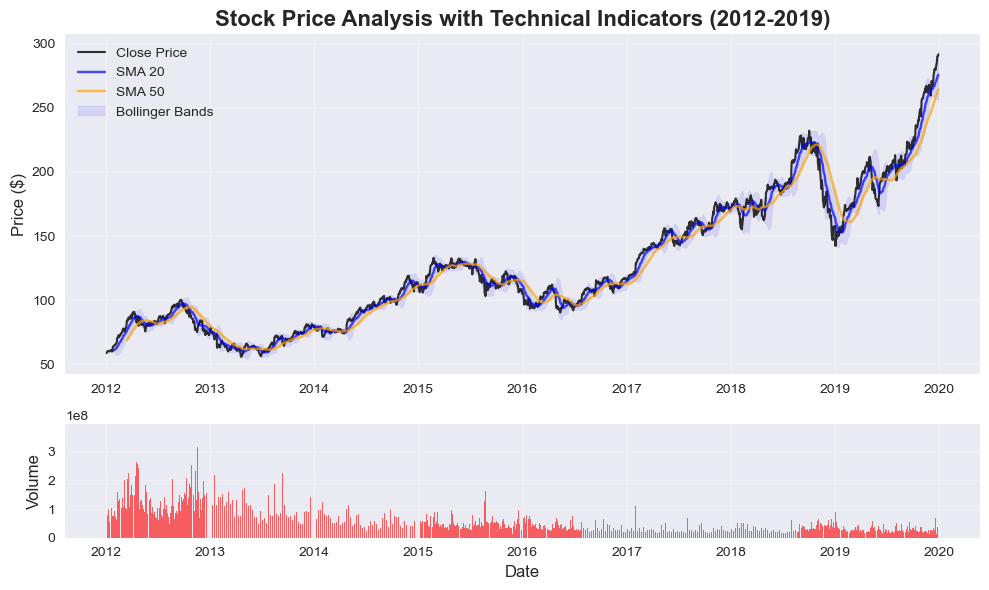

In [128]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1]})
# Price and Moving Averages
ax1.plot(df.index, df['Close'], label='Close Price', color='black', linewidth=1.5, alpha=0.8)
ax1.plot(df.index, df['SMA_20'], label='SMA 20', color='blue', alpha=0.7)
ax1.plot(df.index, df['SMA_50'], label='SMA 50', color='orange', alpha=0.7)
ax1.fill_between(df.index, df['BB_Upper'], df['BB_Lower'], alpha=0.1, color='blue', label='Bollinger Bands')
ax1.set_title('Stock Price Analysis with Technical Indicators (2012-2019)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Volume
ax2.bar(df.index, df['Volume'], color='red', alpha=0.6, width=1)
ax2.set_ylabel('Volume', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Close Price: Actual Apple stock price movement from 2012–2019.
SMA 20 & SMA 50: Short-term and medium-term moving averages used to identify trend direction and crossovers.
Bollinger Bands: Measure price volatility; price touching upper/lower bands indicates overbought or oversold conditions.

Volume: Shows trading activity; spikes often align with major price movements or news events.

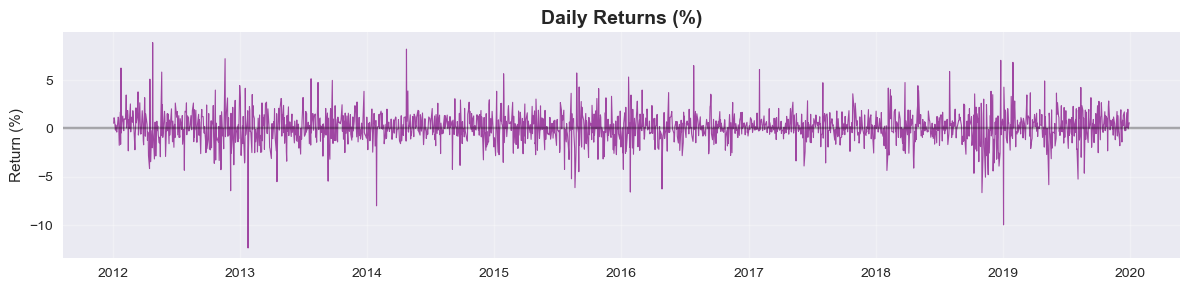

In [129]:
# Daily Returns
plt.figure(figsize=(12, 3))
plt.plot(df.index, df['Daily_Return'] * 100, color='purple', alpha=0.7, linewidth=0.8)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Daily Returns (%)', fontsize=14, fontweight='bold')
plt.ylabel('Return (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Shows daily percentage returns of the stock. Returns fluctuate around 0%, indicating no constant daily trend.
Sharp positive and negative spikes represent sudden market reactions or news events.Increased spread in later years suggests higher volatility.

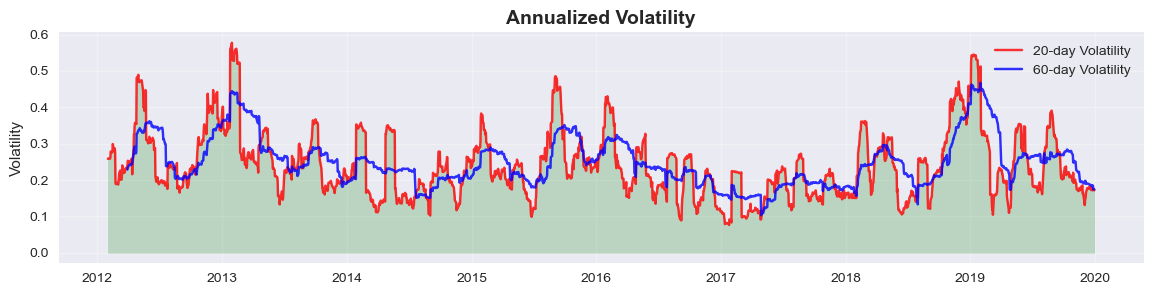

In [130]:
# Rolling Volatility
plt.figure(figsize=(14,3))
plt.plot(df.index, df['Volatility_20'], label='20-day Volatility', color='red', alpha=0.8)
plt.plot(df.index, df['Volatility_60'], label='60-day Volatility', color='blue', alpha=0.8)
plt.fill_between(df.index, 0, df['Volatility_20'], alpha=0.2, color='green')
plt.title('Annualized Volatility', fontsize=14, fontweight='bold')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, alpha=0.3)

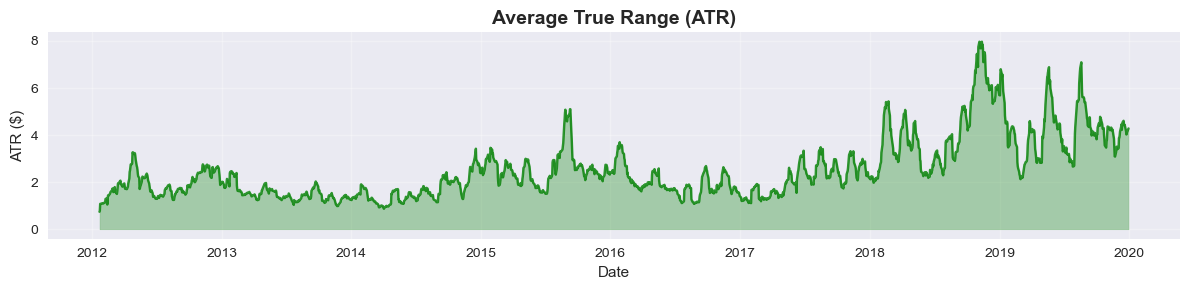

In [131]:
plt.figure(figsize=(12, 3))
plt.plot(df.index, df['ATR_14'], color='green', alpha=0.8)
plt.fill_between(df.index, 0, df['ATR_14'], alpha=0.3, color='green')
plt.title('Average True Range (ATR)', fontsize=14, fontweight='bold')
plt.ylabel('ATR ($)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


The chart shows the Average True Range (ATR) over time, which measures market volatility. Higher ATR values indicate larger price movements and 
increased uncertainty, while lower values reflect more stable periods. Spikes in ATR highlight phases of elevated risk, making it useful for
volatility and risk analysis in stock forecasting.

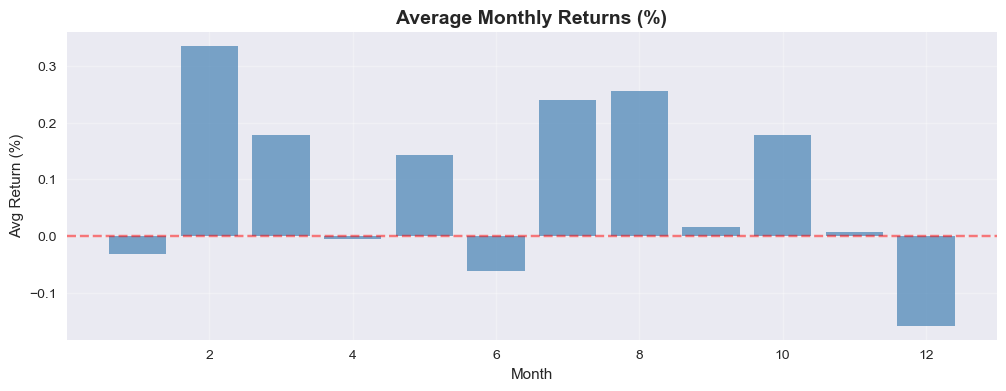

In [132]:
# Monthly Returns Analysis
plt.figure(figsize=(12, 4))
monthly_returns = df.groupby('Month')['Daily_Return'].mean() * 100
plt.bar(monthly_returns.index, monthly_returns.values, color='steelblue', alpha=0.7)
plt.title('Average Monthly Returns (%)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Avg Return (%)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)

The chart shows average monthly returns (%) across the year. Positive bars indicate months with higher average gains, while negative bars represent
weaker or loss-making months. This reveals seasonal return patterns, suggesting that stock performance varies by month and seasonality can be
considered in forecasting and strategy design.

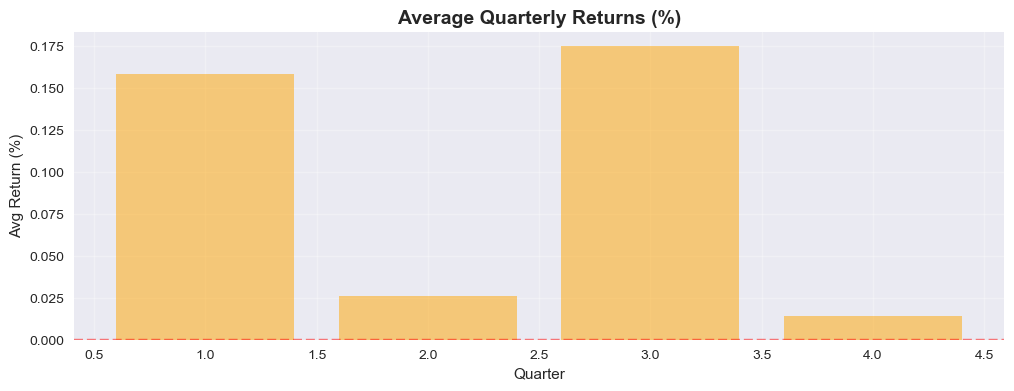

In [133]:
# Quarterly Analysis
plt.figure(figsize=(12, 4))
quarterly_returns = df.groupby('Quarter')['Daily_Return'].mean() * 100
plt.bar(quarterly_returns.index, quarterly_returns.values, color='orange', alpha=0.5)
plt.title('Average Quarterly Returns (%)', fontsize=14, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Avg Return (%)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)

The chart displays average quarterly returns (%). Q1 and Q3 show higher average gains, indicating stronger performance during these periods,
while Q2 and Q4 have relatively lower returns. This highlights quarterly seasonality, which can be useful for understanding cyclical stock behavior
and improving forecasting models.

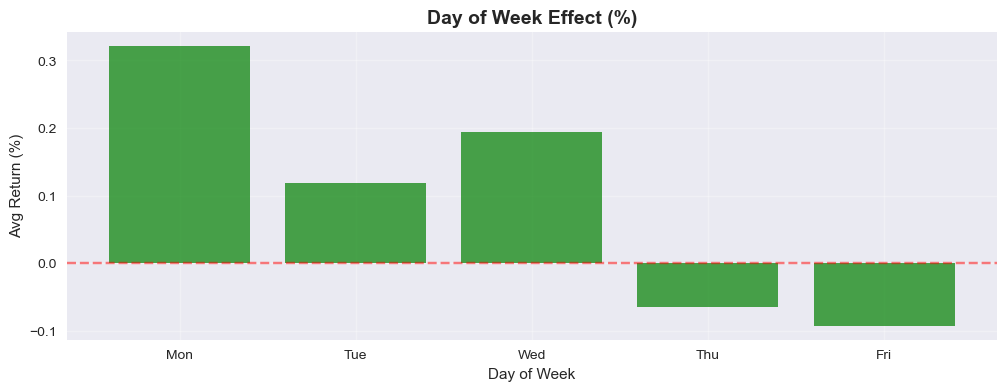

In [134]:
# Day of Week Effect
plt.figure(figsize=(12, 4))
dow_returns = df.groupby('DayOfWeek')['Daily_Return'].mean() * 100

plt.bar(range(5), dow_returns.values, color='green', alpha=0.7)
plt.title('Day of Week Effect (%)', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Avg Return (%)')
plt.xticks(range(5), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)

The chart shows the day-of-week effect on average returns. Mondays and Wednesdays have positive average returns, while Thursdays and Fridays show 
negative returns. This indicates a weekly return pattern, which can be considered as a seasonal feature in stock price analysis and forecasting.

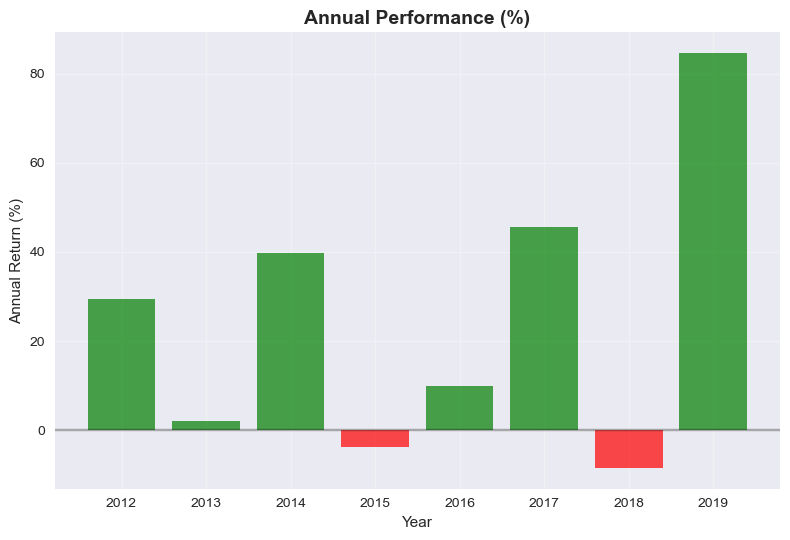

In [135]:
# Annual Performance
df['Year'] = df.index.year
yearly_close = df.groupby('Year')['Close'].last()
yearly_open = df.groupby('Year')['Close'].first()
yearly_performance = ((yearly_close - yearly_open) / yearly_open * 100)

colors = ['green' if x > 0 else 'red' for x in yearly_performance.values]
plt.bar(yearly_performance.index, yearly_performance.values, color=colors, alpha=0.7)
plt.title('Annual Performance (%)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Annual Return (%)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

The chart shows annual stock performance (%) from 2012 to 2019. Most years delivered positive returns, indicating overall growth, while 2015 and 2018 experienced negative performance. 2019 stands out with exceptionally high returns, highlighting a strong recovery and bullish market phase.

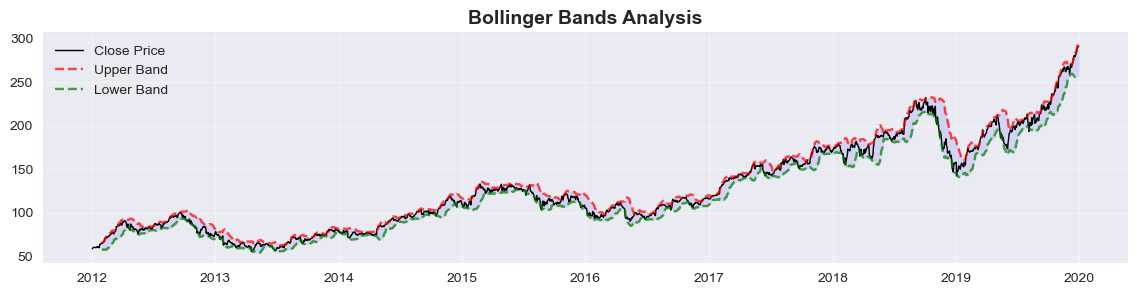

In [136]:
# Price and Bollinger Bands
plt.figure(figsize=(14, 3))
plt.plot(df.index, df['Close'], label='Close Price', color='black', linewidth=1)
plt.plot(df.index, df['BB_Upper'], label='Upper Band', color='red', alpha=0.7, linestyle='--')
plt.plot(df.index, df['BB_Lower'], label='Lower Band', color='green', alpha=0.7, linestyle='--')
plt.fill_between(df.index, df['BB_Upper'], df['BB_Lower'], alpha=0.1, color='blue')
plt.title('Bollinger Bands Analysis', fontsize=14, fontweight='bold')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

The chart shows Bollinger Bands around the stock’s closing price. The upper and lower bands represent volatility boundaries around the moving average. 
When prices move near the upper band, the stock may be overbought, and when near the lower band, it may be oversold. Band widening indicates increased
volatility, while narrowing suggests stable market conditions.

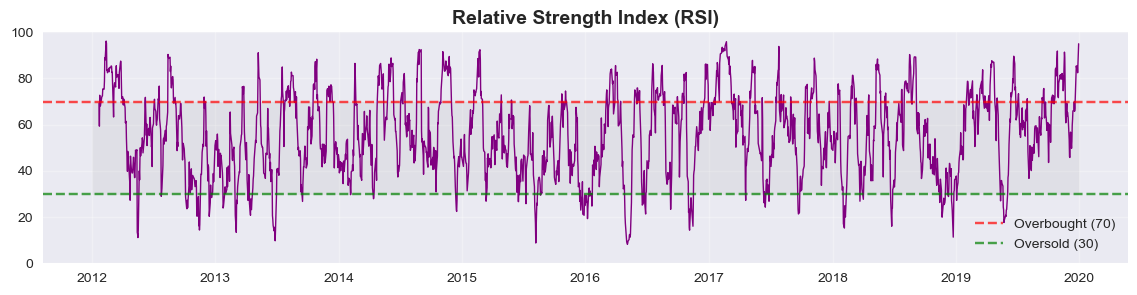

In [137]:
# RSI
plt.figure(figsize=(14, 3))
plt.plot(df.index, df['RSI_14'], color='purple', linewidth=1)
plt.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
plt.fill_between(df.index, 30, 70, alpha=0.1, color='gray')
plt.title('Relative Strength Index (RSI)', fontsize=14, fontweight='bold')
plt.ylim(0, 100)
plt.legend()
plt.grid(True, alpha=0.3)

The chart shows the Relative Strength Index (RSI) over time. Values above 70 indicate overbought conditions, while values below 30 indicate oversold 
conditions.RSI frequently oscillates between these levels, reflecting momentum shifts and helping identify potential trend reversals in the stock price.

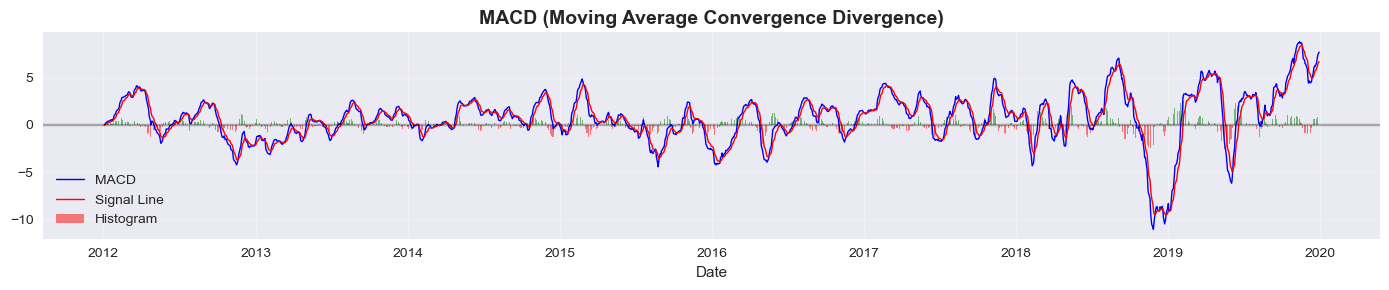

In [138]:
plt.figure(figsize=(14, 3))
plt.plot(df.index, df['MACD'], label='MACD', color='blue', linewidth=1)
plt.plot(df.index, df['MACD_signal'], label='Signal Line', color='red', linewidth=1)
colors_macd = ['green' if val > 0 else 'red' for val in df['MACD_histogram']]
plt.bar(df.index, df['MACD_histogram'], color=colors_macd, alpha=0.5, label='Histogram')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('MACD (Moving Average Convergence Divergence)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

The chart displays the MACD (Moving Average Convergence Divergence) indicator. The MACD line crossing above the signal line suggests bullish momentum, 
while crossing below indicates bearish momentum. The histogram shows the strength of this momentum, helping identify trend changes and potential buy
or sell signals.

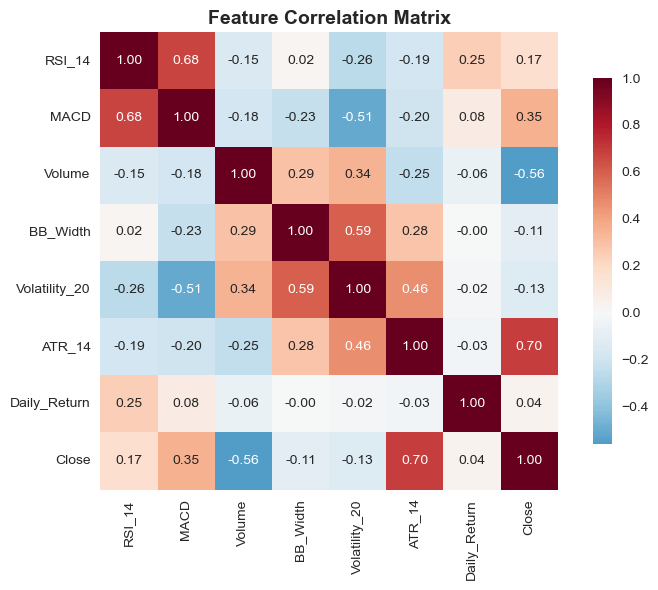

In [139]:
corr_features =  [ "RSI_14", "MACD", 'Volume','BB_Width', 'Volatility_20', 'ATR_14',"Daily_Return",'Close']
corr_matrix = df[corr_features].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, ax=ax, cbar_kws={'shrink': 0.8}, fmt='.2f')
ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The feature correlation matrix shows how technical indicators relate to each other and to the stock’s closing price. The Close price is highly 
correlated with SMA-20 and ATR-14, indicating strong dependence on trend and price range. RSI and MACD show moderate correlation with the market trend,
reflecting momentum effects. Volatility-20 and Bollinger Band width are strongly related, as both measure market uncertainty. Overall, the matrix
highlights which features carry similar information and helps avoid multicollinearity while selecting inputs for forecasting models.

In [140]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import STL
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf


In [141]:
feature_cols = [
    "RSI_14", "MACD", "MACD_signal", "MACD_histogram", "OBV",
    "Stoch_%K", "Stoch_%D", "Williams_%R",
    "BB_Width", "Daily_Return", "Volatility_20", "Close"
]
df = df[feature_cols].dropna()
target = "Close"

In [142]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

train_target = train[target]
test_target = test[target]

In [143]:
train_diff = train_target.diff().diff().dropna()
train_diff

Date
2012-02-03    0.804283
2012-02-06   -0.038574
2012-02-07    0.081437
2012-02-08    0.427138
2012-02-09    1.234284
                ...   
2018-05-23    1.669998
2018-05-24   -1.410004
2018-05-25    0.640015
2018-05-29   -1.110016
2018-05-30    0.280014
Name: Close, Length: 1590, dtype: float64

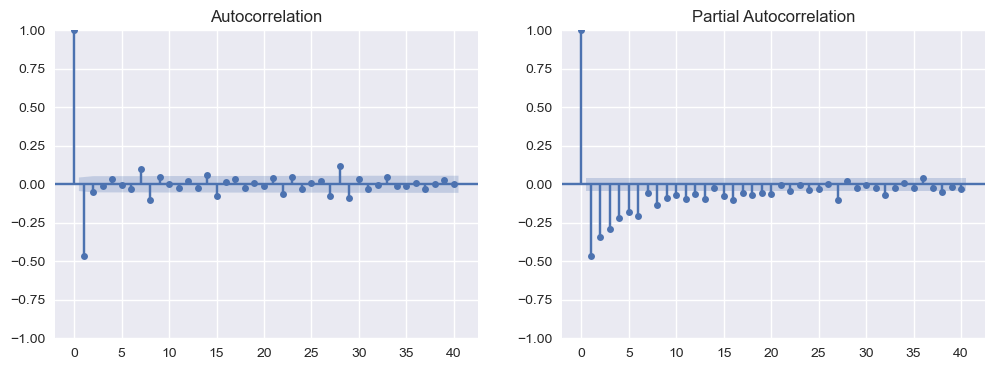

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df["Close"].diff().diff().dropna(), lags=40, ax=ax1)
plot_pacf(df["Close"].diff().diff().dropna(), lags=40, ax=ax2)
plt.show()

# ARIMA MODEL
# ================================

In [145]:
import itertools
import warnings
warnings.filterwarnings("ignore")


p_values = range(0, 6)
d_values = [1] 
q_values = range(0, 6)

pdq_combinations = list(itertools.product(p_values, d_values, q_values))

best_aic = float("inf")
best_order = None

print("Running Grid Search to find optimal (p,d,q)...")

for order in pdq_combinations:
    try:
        
        model = ARIMA(train_target, order=order)
        model_fit = model.fit()

        
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
            print(f"New Best: {order} | AIC: {best_aic}")

    except:
        continue

print("\n----------------------------------------")
print(f"OPTIMAL PARAMETERS FOUND: {best_order}")
print(f"Lowest AIC Score: {best_aic}")
print("----------------------------------------")

Running Grid Search to find optimal (p,d,q)...
New Best: (0, 1, 0) | AIC: 6120.26537814832
New Best: (0, 1, 1) | AIC: 6119.124926101773
New Best: (2, 1, 2) | AIC: 6112.073820522586

----------------------------------------
OPTIMAL PARAMETERS FOUND: (2, 1, 2)
Lowest AIC Score: 6112.073820522586
----------------------------------------


In [146]:
arima_model = ARIMA(train_target, order=(2,1,2))
arima_fit = arima_model.fit()

arima_preds = arima_fit.forecast(steps=len(test))

print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1592
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3051.037
Date:                Sun, 08 Feb 2026   AIC                           6112.074
Time:                        20:26:57   BIC                           6138.934
Sample:                             0   HQIC                          6122.051
                               - 1592                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0787      0.075    -14.348      0.000      -1.226      -0.931
ar.L2         -0.7964      0.064    -12.380      0.000      -0.922      -0.670
ma.L1          1.1394      0.071     16.100      0.0

# SARIMA MODEL
# ================================

In [147]:
p_values = range(0, 3)   # non-seasonal AR terms
d_values = [1]           # differencing
q_values = range(0, 3)   # non-seasonal MA terms

P_values = range(0, 3)   # seasonal AR terms
D_values = [0, 1]        # seasonal differencing
Q_values = range(0, 3)   # seasonal MA terms
s_values = [12]          # seasonality period 

pdq = list(itertools.product(p_values, d_values, q_values))
seasonal_pdq = list(itertools.product(P_values, D_values, Q_values, s_values))

best_aic = float("inf")
best_order = None
best_seasonal_order = None

print("Running Grid Search to find optimal (p,d,q)x(P,D,Q,s)...")

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(train_target,
                            order=order,
                            seasonal_order=seasonal_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            model_fit = model.fit(disp=False)

            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = order
                best_seasonal_order = seasonal_order
                print(f"New Best: {order} x {seasonal_order} | AIC: {best_aic}")

        except Exception as e:
            continue

print("\n----------------------------------------")
print(f"OPTIMAL PARAMETERS FOUND: {best_order} x {best_seasonal_order}")
print(f"Lowest AIC Score: {best_aic}")
print("----------------------------------------")

Running Grid Search to find optimal (p,d,q)x(P,D,Q,s)...
New Best: (0, 1, 0) x (0, 0, 0, 12) | AIC: 6117.4109923845
New Best: (0, 1, 0) x (0, 0, 1, 12) | AIC: 6076.860797189211
New Best: (0, 1, 0) x (0, 0, 2, 12) | AIC: 6040.780598553094
New Best: (0, 1, 0) x (2, 0, 2, 12) | AIC: 6039.1509366333685
New Best: (0, 1, 1) x (0, 0, 2, 12) | AIC: 6037.111934013204
New Best: (0, 1, 2) x (0, 0, 2, 12) | AIC: 6034.749498357532
New Best: (2, 1, 2) x (0, 0, 2, 12) | AIC: 6027.714478562026
New Best: (2, 1, 2) x (2, 0, 2, 12) | AIC: 6025.98234476816

----------------------------------------
OPTIMAL PARAMETERS FOUND: (2, 1, 2) x (2, 0, 2, 12)
Lowest AIC Score: 6025.98234476816
----------------------------------------


In [148]:

sarima_model = SARIMAX(train_target, order=(2,1,2), seasonal_order=(2,0,2,12))
sarima_fit = sarima_model.fit()

sarima_preds = sarima_fit.forecast(steps=len(test))

print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1592
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -3049.390
Date:                            Sun, 08 Feb 2026   AIC                           6116.781
Time:                                    20:38:54   BIC                           6165.130
Sample:                                         0   HQIC                          6134.739
                                           - 1592                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1476      0.069    -16.536      0.000      -1.284      -1.012
ar.L2         -0.8146      0.061   

In [149]:
df["Close_diff"] = df["Close"].diff().diff()
df.dropna(inplace=True)

target_col = "Close_diff"

In [150]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[feature_cols + ["Close_diff"]])

In [151]:
# SEQUENCE CREATION FUNCTION
# ================================
def create_sequences(data, lookback=60):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback, :-1])
        y.append(data[i+lookback, -1])
    return np.array(X), np.array(y)

lookback = 60
X, y = create_sequences(scaled_data, lookback)

In [152]:
# TRAIN TEST SPLIT
# ================================
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [153]:
# LSTM MODEL
# ================================
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

lstm_model.compile(loss="mse", optimizer="adam")
lstm_model.fit(X_train, y_train,epochs=40, batch_size=32, validation_data=(X_test, y_test))

lstm_preds = lstm_model.predict(X_test)

Epoch 1/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0095 - val_loss: 0.0159
Epoch 2/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0039 - val_loss: 0.0165
Epoch 3/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0037 - val_loss: 0.0157
Epoch 4/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0035 - val_loss: 0.0156
Epoch 5/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0035 - val_loss: 0.0156
Epoch 6/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0035 - val_loss: 0.0154
Epoch 7/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0033 - val_loss: 0.0154
Epoch 8/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0034 - val_loss: 0.0152
Epoch 9/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0034 - val_loss: 0.0152
Epoch 10/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0034 - val_loss: 0.0152
Epoch 11/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0035 - val_loss: 0.0149
Epoch 12/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0

In [154]:
# GRU MODEL
# ================================
gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(32),
    Dense(1)
])

gru_model.compile(loss="mse", optimizer="adam")
gru_model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

gru_preds = gru_model.predict(X_test)

Epoch 1/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0427 - val_loss: 0.0184
Epoch 2/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0062 - val_loss: 0.0164
Epoch 3/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0051 - val_loss: 0.0156
Epoch 4/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0046 - val_loss: 0.0155
Epoch 5/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0042 - val_loss: 0.0149
Epoch 6/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0038 - val_loss: 0.0148
Epoch 7/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0036 - val_loss: 0.0143
Epoch 8/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0033 - val_loss: 0.0142
Epoch 9/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0034 - val_loss: 0.0138
Epoch 10/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0032 - val_loss: 0.0139
Epoch 11/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0031 - val_loss: 0.0134
Epoch 12/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0

In [155]:
# INVERSE SCALE PREDICTIONS
# ================================
def inverse_transform(preds):
    temp = np.zeros((len(preds), len(feature_cols) + 1))
    temp[:, -1] = preds.flatten()
    inv = scaler.inverse_transform(temp)
    return inv[:, -1]

# Inverse predictions
y_test_inv = inverse_transform(y_test.reshape(-1,1))
lstm_preds_inv = inverse_transform(lstm_preds)
gru_preds_inv = inverse_transform(gru_preds)

In [156]:
# EVALUATION FUNCTION
# ================================
def evaluate(true, pred, name):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    print(f"\n{name} Performance")
    print("RMSE:", rmse)
    print("MAE:", mae)
    return rmse

arima_rmse = evaluate(test_target, arima_preds, "ARIMA")
sarima_rmse = evaluate(test_target, sarima_preds, "SARIMA")
lstm_rmse = evaluate(y_test_inv, lstm_preds_inv, "LSTM")
gru_rmse = evaluate(y_test_inv, gru_preds_inv, "GRU")


best_model = "GRU" if gru_rmse < lstm_rmse and gru_rmse < sarima_rmse else "SARIMA"if sarima_rmse < lstm_rmse else "LSTM"
print("\nBest Model Selected:", best_model)


ARIMA Performance
RMSE: 34.633091994847064
MAE: 26.028740956458662

SARIMA Performance
RMSE: 34.404289860950456
MAE: 25.82210169696497

LSTM Performance
RMSE: 4.266007107175898
MAE: 3.1981636280814665

GRU Performance
RMSE: 4.1453220936464765
MAE: 3.0454186841662336

Best Model Selected: GRU


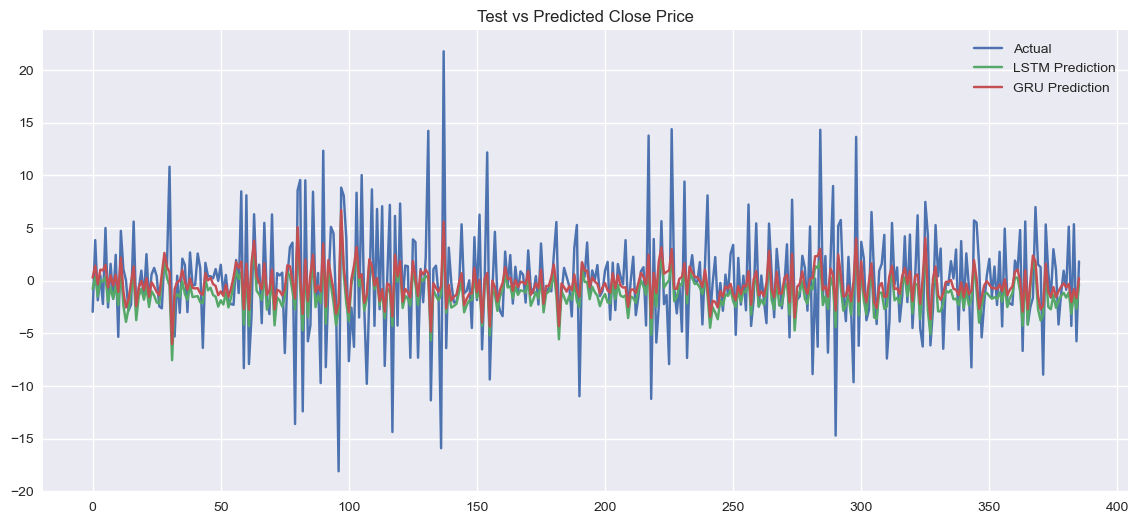

In [157]:
# TEST vs PREDICTION PLOT
# ================================
plt.figure(figsize=(14,6))
plt.plot(y_test_inv, label="Actual")
plt.plot(lstm_preds_inv, label="LSTM Prediction")
plt.plot(gru_preds_inv, label="GRU Prediction")
plt.title("Test vs Predicted Close Price")
plt.legend()
plt.show()

In [158]:
# NEXT 30 DAYS FORECAST FUNCTION
# ================================
future_steps = 30
last_seq = X[-1]
future_preds = []

model_used = gru_model if best_model == "GRU" else lstm_model

for _ in range(future_steps):
    pred = model_used.predict(last_seq.reshape(1, lookback, X.shape[2]))
    future_preds.append(pred[0,0])
    last_seq = np.roll(last_seq, -1, axis=0)
    last_seq[-1, -1] = pred

future_preds_inv = inverse_transform(np.array(future_preds).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

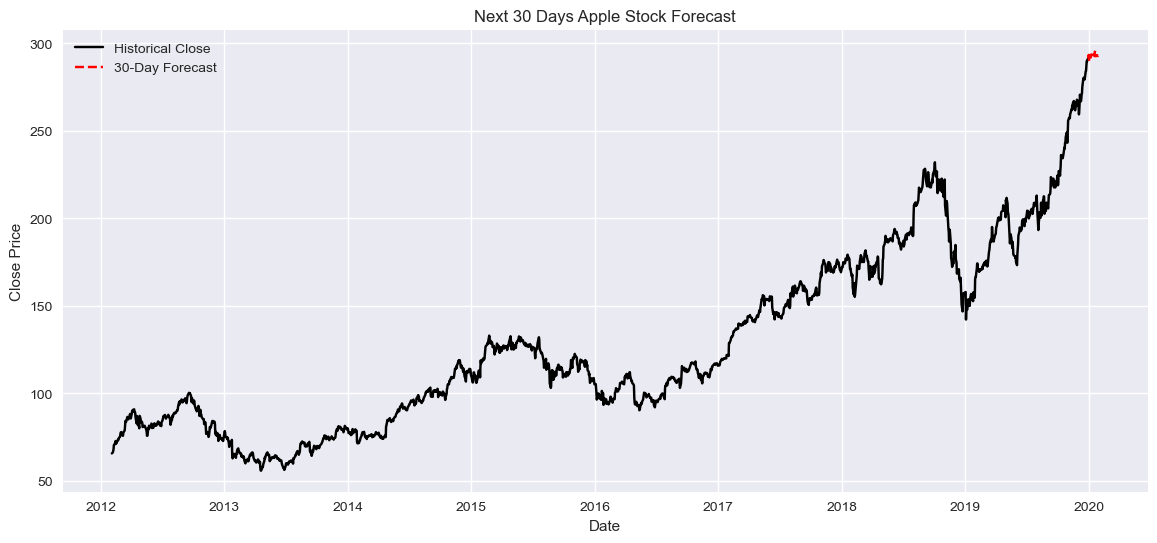

In [159]:
 #================================
# CONVERT DIFF → REAL CLOSE PRICE
# ================================
last_close = df["Close"].iloc[-1]
future_prices = np.cumsum(future_preds_inv) + last_close

# ================================
# FUTURE DATES
# ================================
future_dates = pd.date_range(
    start=df.index[-1] + pd.Timedelta(days=1),
    periods=30,
    freq="D"
)

# ================================
# FUTURE FORECAST PLOT
# ================================
plt.figure(figsize=(14,6))

plt.plot(df.index, df["Close"], label="Historical Close", color="black")
plt.plot(future_dates, future_prices, label="30-Day Forecast", linestyle="dashed", color="red")

plt.title("Next 30 Days Apple Stock Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)

In [160]:
# FORECAST OUTPUT TABLE
# ================================
forecast_df = pd.DataFrame({
    "Date": pd.date_range(
        start=df.index[-1] + pd.Timedelta(days=1),
        periods=30,
        freq="D"
    ),
    "Predicted_Close": future_prices
})

print("\nNext 30 Days Forecast:")
print(forecast_df)


Next 30 Days Forecast:
         Date  Predicted_Close
0  2019-12-31       291.777841
1  2020-01-01       293.466095
2  2020-01-02       289.858388
3  2020-01-03       290.995963
4  2020-01-04       293.186955
5  2020-01-05       292.811221
6  2020-01-06       292.066261
7  2020-01-07       291.939608
8  2020-01-08       292.816701
9  2020-01-09       293.651199
10 2020-01-10       294.552536
11 2020-01-11       294.579104
12 2020-01-12       294.452755
13 2020-01-13       293.816446
14 2020-01-14       294.308890
15 2020-01-15       293.419121
16 2020-01-16       293.742202
17 2020-01-17       293.066408
18 2020-01-18       292.735264
19 2020-01-19       295.158598
20 2020-01-20       295.830905
21 2020-01-21       293.705379
22 2020-01-22       292.668283
23 2020-01-23       292.731094
24 2020-01-24       293.196156
25 2020-01-25       293.346856
26 2020-01-26       293.187241
27 2020-01-27       293.027555
28 2020-01-28       292.778456
29 2020-01-29       292.956121


In [161]:
# SELECT BEST MODEL
# ==============================
scores = {
    "ARIMA": arima_rmse,
    "SARIMA": sarima_rmse,
    "LSTM": lstm_rmse,
    "GRU": gru_rmse
}

best_model_name = min(scores, key=scores.get)
print("Best Model Selected:", best_model_name)

Best Model Selected: GRU


# Deployement 

In [162]:
import joblib
gru_model.save("gru_model.h5")  # TensorFlow
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

#=========================================== *Thank you*======================================#